# 拉普拉斯矩阵特征值分解

同济子豪兄 2022-7-9

参考文档：https://networkx.org/documentation/stable/auto_examples/drawing/plot_eigenvalues.html#sphx-glr-auto-examples-drawing-plot-eigenvalues-py

## 导入工具包

In [1]:
# 图数据挖掘
import networkx as nx

import numpy as np

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
import numpy.linalg # 线性代数

## 创建图

In [5]:
n = 1000  # 节点个数
m = 5000  # 连接个数
G = nx.gnm_random_graph(n, m, seed=5040)

## 邻接矩阵（Adjacency Matrix）

In [34]:
A = nx.adjacency_matrix(G)

In [35]:
A.shape

(1000, 1000)

In [36]:
A.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## 拉普拉斯矩阵（Laplacian Matrix）

$$
L = D - A
$$

L 为拉普拉斯矩阵（Laplacian Matrix）

D 为节点degree对角矩阵

A 为邻接矩阵（Adjacency Matrix）

In [32]:
L = nx.laplacian_matrix(G)

In [40]:
L.shape

(1000, 1000)

In [38]:
# 节点degree对角矩阵
D = L + A

In [39]:
D.todense()

matrix([[12,  0,  0, ...,  0,  0,  0],
        [ 0,  6,  0, ...,  0,  0,  0],
        [ 0,  0,  8, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  8,  0,  0],
        [ 0,  0,  0, ...,  0,  6,  0],
        [ 0,  0,  0, ...,  0,  0,  7]], dtype=int64)

In [1]:
# G.degree()

## 归一化拉普拉斯矩阵（Normalized Laplacian Matrix）

$$
L_n = D^{-\frac{1}{2}}LD^{-\frac{1}{2}}
$$

In [41]:
L_n = nx.normalized_laplacian_matrix(G)

In [42]:
L_n.shape

(1000, 1000)

In [45]:
L_n.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

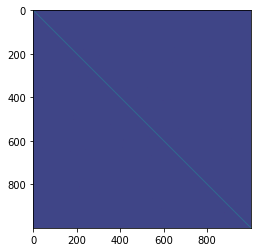

In [51]:
plt.imshow(L_n.todense())
plt.show()

In [52]:
type(L_n)

scipy.sparse.csr.csr_matrix

## 特征值分解

In [55]:
e = np.linalg.eigvals(L_n.A)

In [56]:
e

array([-3.53879524e-16,  1.59246179e+00,  1.58938840e+00,  1.58583526e+00,
        4.02846420e-01,  4.06224295e-01,  4.12963520e-01,  4.15548851e-01,
        4.16517467e-01,  1.58139953e+00,  1.58070318e+00,  4.20582471e-01,
        4.24326947e-01,  1.57786096e+00,  4.29110624e-01,  4.31464217e-01,
        1.57398179e+00,  1.57237733e+00,  4.33218297e-01,  1.57150969e+00,
        1.57095514e+00,  4.35026221e-01,  4.37026657e-01,  1.56726875e+00,
        4.40378510e-01,  4.42775893e-01,  4.45046086e-01,  1.56345866e+00,
        1.56395825e+00,  4.46753827e-01,  4.50881547e-01,  4.48717950e-01,
        4.49417823e-01,  1.56009824e+00,  1.55880096e+00,  1.55717189e+00,
        1.55698938e+00,  1.55475549e+00,  1.54908738e+00,  1.54681927e+00,
        1.54491505e+00,  1.54352783e+00,  1.54231896e+00,  1.54098279e+00,
        1.54051439e+00,  1.53578067e+00,  1.53502733e+00,  1.53439005e+00,
        1.52838134e+00,  1.53085674e+00,  1.53141471e+00,  1.52515680e+00,
        1.52512114e+00,  

In [57]:
# 最大特征值
max(e)

1.5924617911775922

In [58]:
# 最小特征值
min(e)

-3.5387952353433675e-16

## 特征值分布直方图

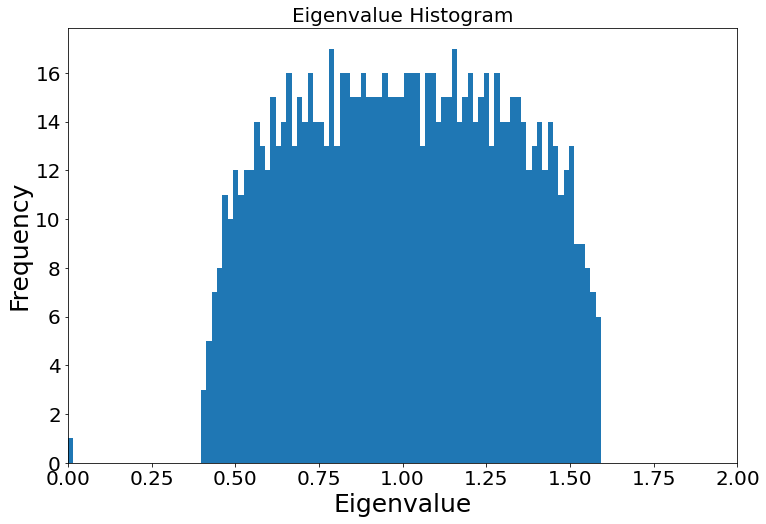

In [59]:
plt.figure(figsize=(12,8))

plt.hist(e, bins=100)
plt.xlim(0, 2)  # eigenvalues between 0 and 2

plt.title('Eigenvalue Histogram', fontsize=20)
plt.ylabel('Frequency', fontsize=25)
plt.xlabel('Eigenvalue', fontsize=25)
plt.tick_params(labelsize=20) # 设置坐标文字大小
plt.show()